In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [4]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,0,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,0,0


In [5]:
data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JDBC,Hibernate,EclipseLink
Projects,,,,,,,
Activiti,automation,1,0,1,0,1,0
airbyte,infrastructure management,0,1,0,0,0,0
airsonic,media,1,0,0,0,0,1
spring-cloud-alibaba,infrastructure management,0,0,1,0,1,0
nacos,infrastructure management,1,0,0,0,0,0


In [6]:
data_jpa = df[["Projects", "Domains", "JPA"]].copy()
data_jpa.iloc[: , 2:].sum().sort_values(ascending=False)

JPA    67
dtype: int64

In [7]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        155
Hibernate       94
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

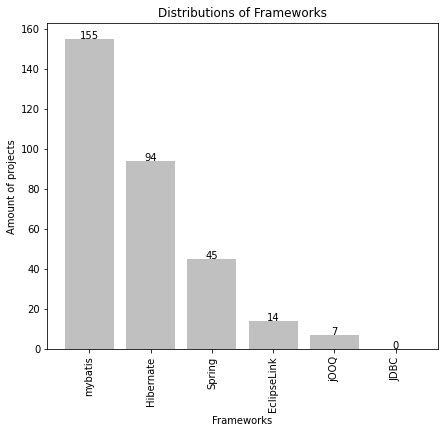

In [8]:
plt.figure(figsize=(7,6))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center') #

df = data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.title("Distributions of Frameworks")
plt.xlabel("Frameworks")
plt.ylabel("Amount of projects")
plt.show() 

In [9]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()
#data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
#data_with_index.reset_index(inplace=True)

,Projects,N DB-Code Test,N DB-Code Java,N DB-Code XML,N DB-Code Not Java/XML,N Dependencies Test,N Dependencies Code,N Dependencies XML,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
0,Activiti,33.0,44.0,97.0,1.0,52.0,210.0,NaN,NaN,4872,264.0,0.677340,0.903120,1.990969,1.067323,4.310345,NaN,5.418719
1,airbyte,34.0,12.0,NaN,1.0,88.0,45.0,NaN,NaN,6172,202.0,0.550875,0.194426,NaN,1.425794,0.729099,NaN,3.272845
2,airsonic,NaN,1.0,31.0,12.0,1.0,4.0,NaN,NaN,1535,6.0,NaN,0.065147,2.019544,0.065147,0.260586,NaN,0.390879
3,spring-cloud-alibaba,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,645,NaN,NaN,NaN,0.310078,NaN,NaN,NaN,NaN
4,nacos,NaN,9.0,NaN,1.0,3.0,11.0,NaN,NaN,1939,26.0,NaN,0.464157,NaN,0.154719,0.567303,NaN,1.340897


In [10]:
data_with_index = df.iloc[: , :].sort_values(by='N Total DB', ascending=False)
#data_with_index = df.iloc[: , :].sort_values(by='Total-DB', ascending=False)
data_with_index.head()

,Projects,N DB-Code Test,N DB-Code Java,N DB-Code XML,N DB-Code Not Java/XML,N Dependencies Test,N Dependencies Code,N Dependencies XML,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
89,ebean,794.0,18.0,4.0,1.0,NaN,NaN,NaN,NaN,3834,1622.0,20.709442,0.469484,0.104330,NaN,NaN,NaN,42.305686
44,cas,254.0,187.0,4.0,7.0,616.0,457.0,NaN,NaN,8451,1085.0,3.005561,2.212756,0.047332,7.289078,5.407644,NaN,12.838717
127,nomulus,58.0,90.0,2.0,7.0,341.0,422.0,10.0,10.0,3879,940.0,1.495231,2.320186,0.051560,8.790925,10.879093,0.257798,24.233050
267,sonarqube,12.0,87.0,67.0,NaN,285.0,618.0,3.0,3.0,11234,907.0,0.106819,0.774435,0.596404,2.536941,5.501157,0.026705,8.073705
90,che,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181,811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [12]:
index_list = []
for feature in ['DB-Code Test', 'DB-Code Java']:
#for feature in ['DB-Code(Java)', 'Dependencies']:
    index_list.extend(outliers(df, feature))

In [13]:
index_list

[44,
 50,
 82,
 89,
 105,
 127,
 183,
 253,
 282,
 313,
 20,
 30,
 40,
 44,
 47,
 50,
 81,
 88,
 122,
 127,
 173,
 183,
 202,
 205,
 209,
 213,
 224,
 253,
 282,
 289,
 291,
 292,
 305,
 307]

In [14]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [15]:
df_cleaned = remove(df, index_list)
df_cleaned.head()

,Projects,N DB-Code Test,N DB-Code Java,N DB-Code XML,N DB-Code Not Java/XML,N Dependencies Test,N Dependencies Code,N Dependencies XML,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
0,Activiti,33.0,44.0,97.0,1.0,52.0,210.0,NaN,NaN,4872,264.0,0.677340,0.903120,1.990969,1.067323,4.310345,NaN,5.418719
1,airbyte,34.0,12.0,NaN,1.0,88.0,45.0,NaN,NaN,6172,202.0,0.550875,0.194426,NaN,1.425794,0.729099,NaN,3.272845
2,airsonic,NaN,1.0,31.0,12.0,1.0,4.0,NaN,NaN,1535,6.0,NaN,0.065147,2.019544,0.065147,0.260586,NaN,0.390879
3,spring-cloud-alibaba,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,645,NaN,NaN,NaN,0.310078,NaN,NaN,NaN,NaN
4,nacos,NaN,9.0,NaN,1.0,3.0,11.0,NaN,NaN,1939,26.0,NaN,0.464157,NaN,0.154719,0.567303,NaN,1.340897


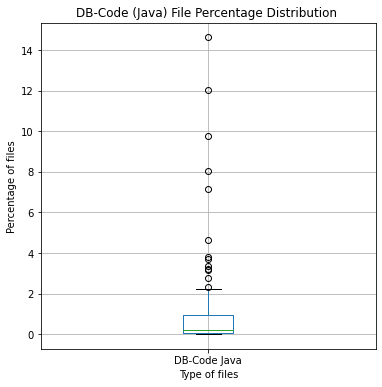

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize =(6, 6))

#stud_bplt = df_cleaned.boxplot(column=['DB-Code Test'])
#stud_bplt = df.boxplot(column=['Total DB'])
stud_bplt = df.boxplot(column=['DB-Code Java'])

stud_bplt.plot()
plt.title("DB-Code (Java) File Percentage Distribution ")
plt.xlabel("Type of files")
plt.ylabel("Percentage of files")
plt.show()

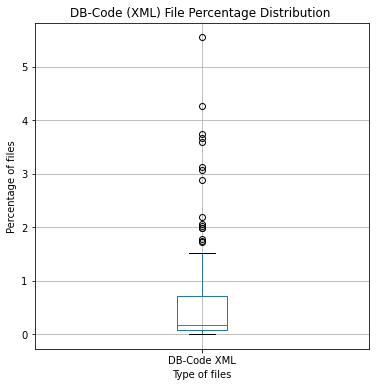

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['DB-Code XML'])

stud_bplt.plot()
plt.title("DB-Code (XML) File Percentage Distribution ")
plt.xlabel("Type of files")
plt.ylabel("Percentage of files")
plt.show()

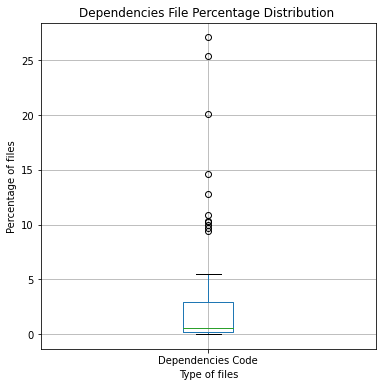

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Dependencies Code'])

stud_bplt.plot()
plt.title("Dependencies File Percentage Distribution ")
plt.xlabel("Type of files")
plt.ylabel("Percentage of files")
plt.show()

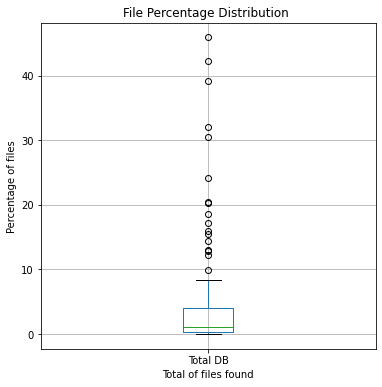

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Total DB'])

stud_bplt.plot()
plt.title("File Percentage Distribution ")
plt.xlabel("Total of files found")
plt.ylabel("Percentage of files")
plt.show()

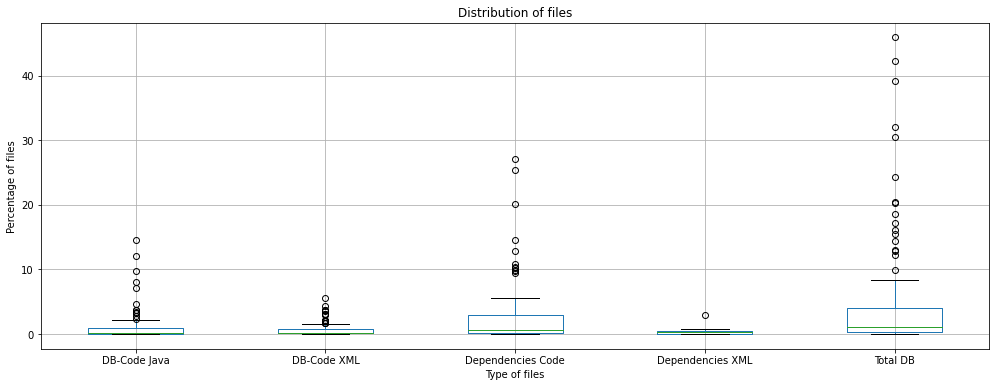

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize =(17, 6))
stud_bplt = df.boxplot(column=['DB-Code Java', 'DB-Code XML', 'Dependencies Code', 'Dependencies XML', 'Total DB'])

stud_bplt.plot()
plt.title("Distribution of files")
plt.ylabel("Percentage of files")
plt.xlabel("Type of files")
plt.show()

In [21]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

KeyboardInterrupt: 

In [22]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(JPA),(EclipseLink),0.208075,0.043478,0.034161,0.164179,3.776119,0.025115,1.144410
11,(JPA),(Spring),0.208075,0.139752,0.065217,0.313433,2.242786,0.036139,1.252971
16,(JPA),(Hibernate),0.208075,0.291925,0.121118,0.582090,1.993966,0.060376,1.694321
3,(JPA),(mybatis),0.208075,0.481366,0.158385,0.761194,1.581319,0.058225,2.171778


In [23]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')
#df_usage_fan_in.rename(columns={"A": "a", "B": "c"})

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
#implementation_usage = implementation_usage.drop(columns=['DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Total-Project' ])
implementation_usage.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink,N DB-Code Test,...,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
0,Activiti,automation,mybatis,NaN,Spring,JPA,NaN,Hibernate,NaN,33.0,...,NaN,4872,264.0,0.677340,0.903120,1.990969,1.067323,4.310345,NaN,5.418719
1,airbyte,infrastructure management,NaN,jOOQ,NaN,NaN,NaN,NaN,NaN,34.0,...,NaN,6172,202.0,0.550875,0.194426,NaN,1.425794,0.729099,NaN,3.272845
2,airsonic,media,mybatis,NaN,NaN,NaN,NaN,NaN,EclipseLink,NaN,...,NaN,1535,6.0,NaN,0.065147,2.019544,0.065147,0.260586,NaN,0.390879
3,spring-cloud-alibaba,infrastructure management,NaN,NaN,Spring,NaN,NaN,Hibernate,NaN,NaN,...,NaN,645,NaN,NaN,NaN,0.310078,NaN,NaN,NaN,NaN
4,nacos,infrastructure management,mybatis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1939,26.0,NaN,0.464157,NaN,0.154719,0.567303,NaN,1.340897


In [24]:
implementation_usage = implementation_usage.drop(columns='Projects')

new_frameworks_list = []
new_frameworks_list_string = []

frameworks_list = implementation_usage.iloc[: , 2:7].values.tolist()  

for i in frameworks_list:
    new_frameworks_list_not_null = [x for x in i if pd.isnull(x) == False]
    new_frameworks_list_string = '/'.join([str(item) for item in new_frameworks_list_not_null])
    new_frameworks_list.append(new_frameworks_list_string)

df_implementation_usage = implementation_usage.iloc[: , 8:]
df_implementation_usage = df_implementation_usage.assign(ListFrameworks = new_frameworks_list)

#print(df_implementation_usage)

df_group_implementation_usage = df_implementation_usage.groupby('ListFrameworks')['Total DB'].apply(list).reset_index(name='NumberDBFiles')

df_group_implementation_usage.head()




,ListFrameworks,NumberDBFiles
0,,"[0.3908794788273616, 1.340897369778236, nan, n..."
1,Hibernate,"[nan, 0.482218203737191, 0.627177700348432, na..."
2,JPA,"[nan, nan, 4.826254826254826, 0.85959885386819..."
3,JPA/Hibernate,"[0.6314127861089187, 0.8616529951058111, nan, ..."
4,Spring,"[nan, nan, nan, nan, 45.91836734693878, nan, n..."


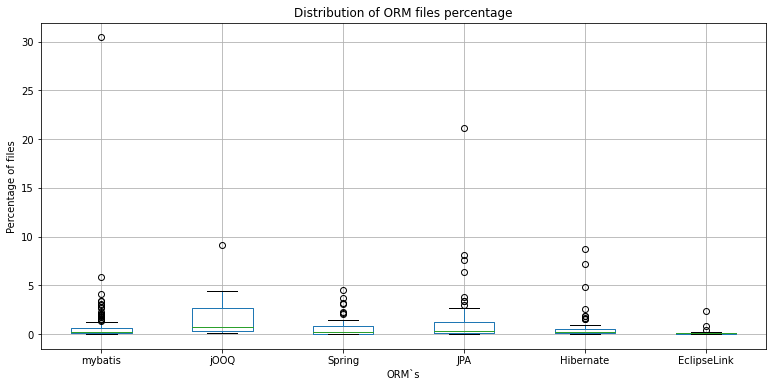

In [25]:
import matplotlib.pyplot as plt

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

plt.figure(figsize =(13, 6))
stud_bplt = df.boxplot(column=['mybatis', 'jOOQ', 'Spring', 'JPA', 'Hibernate', 'EclipseLink']);
stud_bplt.plot()
plt.title("Distribution of ORM files percentage")
plt.xlabel("ORM`s")
plt.ylabel("Percentage of files")
plt.show()



In [34]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.rename(columns = {'(IgnoreCase, SQL)':'SQL'})
df.head()

,Projects,Domains,Builder,SQL
0,Activiti,automation,1,1
1,airbyte,infrastructure management,1,1
2,airsonic,media,1,1
3,spring-cloud-alibaba,infrastructure management,1,1
4,nacos,infrastructure management,1,1


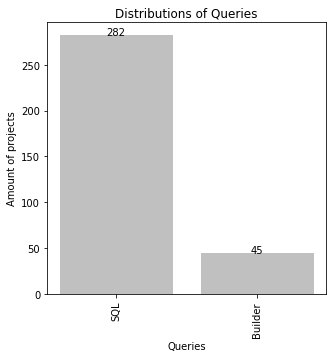

In [35]:
plt.figure(figsize=(5,5))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center') #

df = df.iloc[: , 2:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.title("Distributions of Queries")
plt.xlabel("Queries")
plt.ylabel("Amount of projects")
plt.show()

In [36]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.rename(columns = {'(IgnoreCase, SQL)':'SQL'})
df['SumPerProject'] = df.sum(axis=1)

df_count_2 = df[df.SumPerProject == 2].count()
print(df_count_2)
df_count_sql = df[df.SQL ==1].count()
print(df_count_sql)
df_count_builder = df[df.Builder == 1].count()
print(df_count_builder)
df_count_0 = df[df.SumPerProject == 0].count()
print(df_count_0)


Projects         44
Domains          44
Builder          44
SQL              44
SumPerProject    44
dtype: int64
Projects         282
Domains          282
Builder          282
SQL              282
SumPerProject    282
dtype: int64
Projects         45
Domains          45
Builder          45
SQL              45
SumPerProject    45
dtype: int64
Projects         39
Domains          39
Builder          39
SQL              39
SumPerProject    39
dtype: int64


<ipython-input-36-12577625220d>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['SumPerProject'] = df.sum(axis=1)


<AxesSubplot:xlabel='Type of file', ylabel='total'>

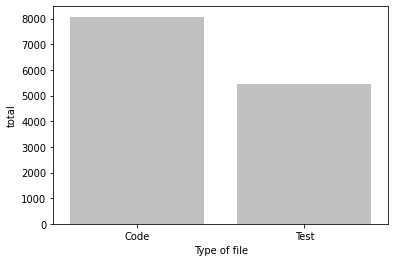

In [37]:
import seaborn as sns

number_of_files = pd.read_excel('../resources/number_of_files.xlsx')

total_code_files = number_of_files['Code'].sum()
total_test_files = number_of_files['Test'].sum()

dados = {
    'Type of file': ['Code', 'Test'],
    'total': [total_code_files, total_test_files]
}

dados = pd.DataFrame(dados)

sns.barplot(x = 'Type of file', y = 'total', data = dados, color = 'silver')

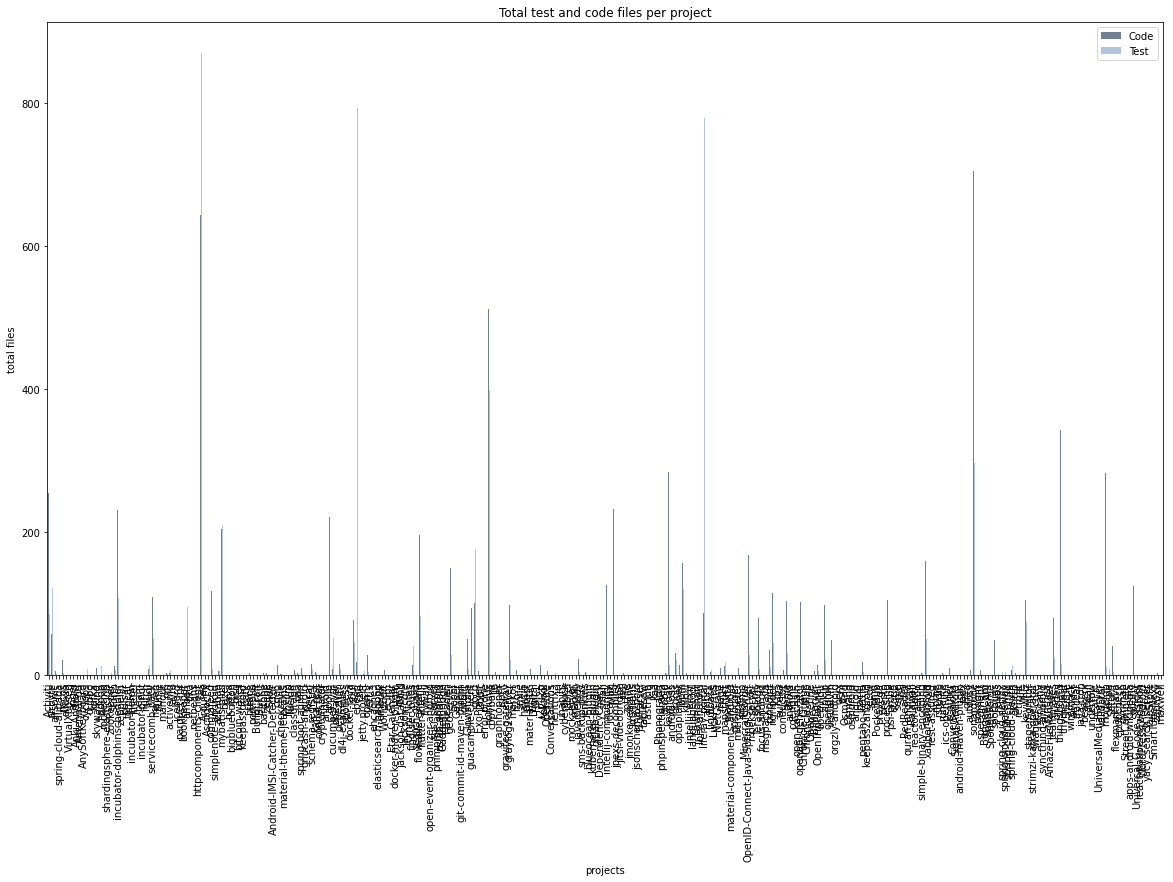

In [38]:
type_of_files  = number_of_files[['Project', 'Code', 'Test']]
type_of_files = type_of_files.set_index('Project')

type_of_files.iloc[0:].plot(kind='bar', title="Total test and code files per project", color = ['slategrey', 'lightsteelblue'])
plt.xlabel("projects")
plt.ylabel("total files")
plt.rcParams.update({'font.size': 18})
plt.gcf().set_size_inches(20, 12)